#### Note: This Notebook covers the Data Engineering/ETL exercises for Databricks Coding assignment.
`PySpark exercises based on Databricks Coding Assignment`

You are expected to perform research online for many of these questions, so please note any resources you referred to with a link or comment.

Your answers do not need to fit into one cell. Just ensure that your answers are neat, labelled, and clearly explained. Additionally, this notebook should be able to run top-to-bottom, and it should not produce any errors.

You may write your code answers in Scala or Python unless otherwise directed. Each code answer should be accompanied by a short description that outlines what your code does and why you chose to implement it that way.

## Using Airlines Data Set
The following questions use the airlines dataset located at `dbfs:/databricks-datasets/airlines`. 

**Note**: The full dataset is 20+ GB and will take too long to read on a small cluster, but you must read in **at least 5 files**.

#### Airlines Question 1 [5 Points]
Write code that uses the DataFrame API to read in the airlines data set with clearly named columns.

In [ ]:
#get schema from initial csv part
init_df = spark.read.csv("/databricks-datasets/airlines/part-00000",header=True,inferSchema=True)
#apply schema to other parts and aggregate it from part 0-9 using regex
csvFile = spark.read.csv("/databricks-datasets/airlines/part-0000*",header=True,schema=init_df.schema)
display(csvFile)

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,12,20,7,1330,1305,1502,1445,AS,84,NA,92,100,NA,17,25,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,21,1,1326,1305,1514,1445,AS,84,NA,108,100,NA,29,21,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,22,2,1314,1305,1447,1445,AS,84,NA,93,100,NA,2,9,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,23,3,1336,1305,1455,1445,AS,84,NA,79,100,NA,10,31,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,24,4,1332,1305,1454,1445,AS,84,NA,82,100,NA,9,27,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,26,6,1305,1305,1443,1445,AS,84,NA,98,100,NA,-2,0,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,NO,NO
1987,12,27,7,1314,1305,1506,1445,AS,84,NA,112,100,NA,21,9,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,29,2,1410,1305,1543,1445,AS,84,NA,93,100,NA,58,65,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,YES,YES
1987,12,30,3,1315,1305,1443,1445,AS,84,NA,88,100,NA,-2,10,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,NO,YES
1987,12,31,4,1305,1305,1440,1445,AS,84,NA,95,100,NA,-5,0,PDX,SFO,550,NA,NA,0,NA,0,NA,NA,NA,NA,NA,NO,NO


<h1><font color="#d62293">Explanation</font></h1>

The CSV file partitions provided only had the schema definition in the **first file only**.  
So I created an aggregated CSV file with the schema definition inferred from the first file. I used **spark.read.csv()** function to read the CSV files.

#### Airlines Question 2 [5 Points]
How many unique airlines are present in this dataset?

In [ ]:
#perform sql query to get unique airlines
csvFile.select('UniqueCarrier').distinct().count()

Out[46]: 14

<h1><font color="#d62293">Explanation</font></h1>
I used a simple Spark SQL query with the **DISTINCT** parameter to show the resultant data.

#### Airlines Question 3 [10 Points]
Which airline is delayed on departure most often? Show a bar graph of the top five most delayed airlines.

The most delayed on departure airline is AA.

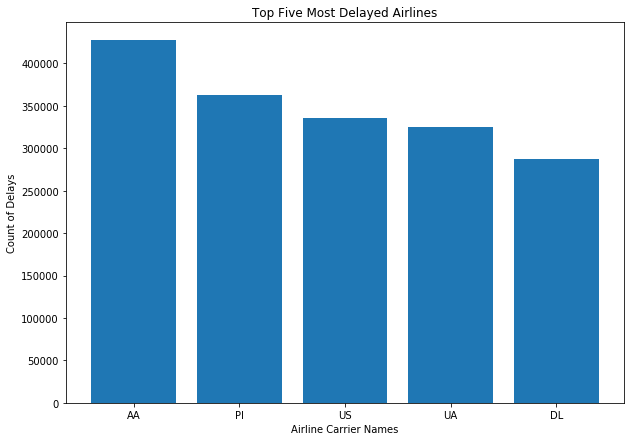

In [ ]:
from pyspark.sql import functions as f
df = csvFile
import matplotlib.pyplot as plt

#get a view dataframe sorted in desc order
view=df.groupby("UniqueCarrier").agg(f.sum((f.when(f.col('IsDepDelayed')=='YES',1)))\
                                     .alias('Count')).sort(f.col('Count').desc())

# display(view.head()) returns an array of the topmost value 
print("The most delayed on departure airline is {}.".format(view.head()[0]))

#getting a bar graph of top five delayed airlines converting the Dataframe to a Pandas Dataframe to use matplotlib
bar1=view.toPandas()
name = bar1['UniqueCarrier'].head(5)
count = bar1['Count'].head(5)
 
# Figure Size according to my preference
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name, count)
plt.title('Top Five Most Delayed Airlines')
plt.xlabel('Airline Carrier Names')
plt.ylabel('Count of Delays')
# Show Plot
plt.show()

<h1><font color="#d62293">Explanation</font></h1>

I grouped the dataframes with respect to **Unique Carriers** and performed an **aggregate SUM** function when IsDepDelayed=='YES'.Then I sorted the view dataframe in descending order and used .head() function to get the top delayed on departure airline names.  

I faced errors in properly plotting the spark dataframes so I converted it to Pandas dataframe using PySpark's **.toPandas()** function.
I used *pyplot* module in **matplotlib** to make a bar graph based on top 5 delayed airlines and their individual count of IsDepDelayed=='YES'.

#### Airlines Question 4 [15 Points]
What was the average arrival delay per airline, and on average, did flights arrive early or late? 

Add a column to this new dataframe (containing the grouped averages) that contains the string "Late" if the average arrival for that airline arrive >15 minutes late, "Early" if the average arrival is <0 minutes late, and "On-time" if the average arrival is between 0 and 15 minutes late.

To add the additional column, use a Spark UDF. Additionally, make sure to filter out or fill in null values in your dataframe (if there are any) prior to applying the UDF.

In [ ]:
#remove NA values
dataframe=df.where(df.ArrDelay!='NA')

# sub ques 1
#Show Mean Arrival Delays Grouping by Unique Carrier
print("Average Arrival Delay Per Airline")
dataframe.groupBy("UniqueCarrier").agg(f.mean('ArrDelay')\
                                       .alias('Average Arrival Delay Time (in minutes)'))\
.sort(f.col('Average Arrival Delay Time (in minutes)')).show()

#create a new dataframe based on asc sorted dataframe
new_df=dataframe.groupBy("UniqueCarrier").agg(f.mean('ArrDelay')\
                                              .alias('Average Arrival Delay Time (in minutes)'))\
.sort(f.col('Average Arrival Delay Time (in minutes)'))

print("\n")


#Show aggregated average Arrival Delay Time 

agg_avg=new_df.agg(f.mean('Average Arrival Delay Time (in minutes)')\
           .alias('Average Arrival Delay for all Airlines (in minutes)')).head()

if agg_avg[0]<0:
    print("Flights on average arrived Early.")
elif agg_avg[0]>15:
    print("Flights on average arrived Late.")
else:
    print("Flights arrived On Time.")

new_df.agg(f.mean('Average Arrival Delay Time (in minutes)')\
           .alias('Average Arrival Delay for all Airlines (in minutes)')).show()

print("\n\n")

#sub ques 2
#Creating a new Dataframe and using Spark UDF withColumn() function
print("Dataframe with status column")
new_df.withColumn("Status", f.when(f.column('Average Arrival Delay Time (in minutes)')
                                       .between(0,15),"On Time")\
                  .when(f.column('Average Arrival Delay Time (in minutes)')<0.0,"Early")\
                  .otherwise("Late")
                 ).show()


Average Arrival Delay Per Airline
+-------------+---------------------------------------+
UniqueCarrier|Average Arrival Delay Time (in minutes)|
+-------------+---------------------------------------+
 WN| 3.8161725234659842|
 AA| 4.355758844379212|
 HP| 5.16627978988358|
 CO| 6.789368571350619|
 DL| 7.290191801939226|
 UA| 7.618634399878093|
 EA| 7.95947087722769|
 TW| 7.991789558997128|
 US| 8.342128296394947|
 NW| 8.39179831082866|
 PA (1)| 8.418492400383403|
 AS| 8.670449172576832|
 PI| 8.823224194382217|
 PS| 9.261881326479774|
+-------------+---------------------------------------+



Flights arrived On Time.
+---------------------------------------------------+
Average Arrival Delay for all Airlines (in minutes)|
+---------------------------------------------------+
 7.3496885762976705|
+---------------------------------------------------+




Dataframe with status column
+-------------+---------------------------------------+-------+
UniqueCarrier|Average Arrival Delay Time (in minutes)| Status|
+-------------+---------------------------------------+-------+
 WN| 3.8161725234659842|On Time|
 AA| 4.355758844379212|On Time|
 HP| 5.16627978988358|On Time|
 CO| 6.789368571350619|On Time|
 DL| 7.290191801939226|On Time|
 UA| 7.618634399878093|On Time|
 EA| 7.95947087722769|On Time|
 TW| 7.991789558997128|On Time|
 US| 8.342128296394947|On Time|
 NW| 8.39179831082866|On Time|
 PA (1)| 8.418492400383403|On Time|
 AS| 8.670449172576832|On Time|
 PI| 8.823224194382217|On Time|
 PS| 9.261881326479774|On Time|
+-------------+---------------------------------------+-------+

<h1><font color="#d62293">Explanation</font></h1>

First I selected the records which didn't have *NA* value in their **ArrDelay** columns.  
Then I grouped the records on the basis of Unique Carrier name and calculated the mean Arrival Delay time for each carrier.
Once the mean was calculated I calculated the total average arrival delay time for all airlines.  
In the **sub-question** for displaying a new column, I used Spark's UDF **.withColumn()** function to add it. To display the status according to given conditions, I used the **when..otherwise** clause provided by the PySpark.sql library.

#### Airlines Question 5 [15 Points]
What file format is airlines data stored in, and was this the most optimal format for the questions asked above? 

What format would you store this data in if you frequently queried only the UniqueCarr and CancellationCode columns? 

What if you frequently read entire rows of the dataset? 

**Note:** Cite any sources used. You do not need a code answer for this question.

<h1><font color="#d62293">Answer</font></h1>

The airlines data is stored in *CSV* file format. **NO** this was not the optimal format for the questions asked above since we didn't require to query all the columns of the dataset. Also CSV files take large amounts of memory to store in comparison to Big Data file formats.  
**Parquet** file format can be used since we are performing column-specific querying and thereby data should be stored in a columnar storage format.  
**Avro** format can be used to store data since it is a much optimised storage format for row-based storage.  
I used the [following reference](https://medium.com/analytics-vidhya/big-data-formats-explained-using-spark-on-azure-gcp-part-1-a83d153c4e66).

#### Airlines Question 6 [5 Points]
If you needed to keep multiple versions of this dataset, why might you use the [Delta format](https://delta.io/) to do this efficiently?

<h1><font color="#d62293">Explanation</font></h1>

**Delta** creates versions in its log which points to the data where it has been successfully modified. If a user wants to revert back to a previous version, he can easily check the commit number on the Delta log file.

## Using Baby Names Data Set

This dataset comes from a website referenced by [Data.gov](http://catalog.data.gov/dataset/baby-names-beginning-2007). It lists baby names used in the state of NY from 2007 to 2012.

Run the following three cells to copy this file to the cluster.

In [ ]:
%fs rm dbfs:/tmp/rows.json

res11: Boolean = true

In [ ]:
%scala

import java.net.URL
import java.io.File
import org.apache.commons.io.FileUtils

val tmpFile = new File("/tmp/rows.json")
FileUtils.copyURLToFile(new URL("https://health.data.ny.gov/api/views/jxy9-yhdk/rows.json?accessType=DOWNLOAD"), tmpFile)

import java.net.URL
import java.io.File
import org.apache.commons.io.FileUtils
tmpFile: java.io.File = /tmp/rows.json

In [ ]:
%fs mv file:/tmp/rows.json dbfs:/tmp/rows.json

res13: Boolean = true

#### Baby Names Question 1 - Nested Data [15 Points]


Use Spark SQL's native JSON support to read the baby names file into a dataframe. Use this dataframe to create a temporary table containing all the nested data columns ("sid", "id", "position", "created_at", "created_meta", "updated_at", "updated_meta", "meta", "year", "first_name", "county", "sex", "count") so that they can be queried using SQL. 

Hint: you can use ```%fs head dbfs:/tmp/rows.json``` to take a look at the dataset before reading it in. 

Suggested Steps:
1. Read in the JSON data
2. Pull all columns in the nested data column to top level, following the schema specified above
3. Create a temp table from this expanded dataframe using createOrReplaceTempView()

In [ ]:
from pyspark.sql.functions import explode

#using explode function to get only data and creating tempview data
spark.read.json('dbfs:/tmp/rows.json', multiLine=True).select(explode("data").alias("data")).createOrReplaceTempView("data")

#using sqlContext for step 2
insightData=sqlContext.sql("SELECT data[0] AS sid, data[1] AS id, data[2] AS position, data[3] AS created_at, data[4] AS created_meta,\
data[5] AS updated_at, data[6] AS updated_meta, data[7] AS meta, data[8] AS year, data[9] AS first_name,\
data[10] AS county, data[11] AS sex, data[12] AS count FROM data")

insightData.show()
insightData.createOrReplaceTempView("insightData")


+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+-----------+---+-----+
 sid| id|position|created_at|created_meta|updated_at|updated_meta|meta|year|first_name| county|sex|count|
+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+-----------+---+-----+
row-r9pv-p86t.ifsp|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOEY| KINGS| F| 11|
row-7v2v~88z5-44se|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOEY| SUFFOLK| F| 6|
row-hzc9-4kvv~mbc9|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOEY| MONROE| F| 6|
row-3473_8cwy~3vez|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOEY| ERIE| F| 9|
row-tyuh.nmy9.r2n3|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| ULSTER| F| 5|
row-ct48~ui69-2zsn|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE|WESTCHESTER| F| 24|
row-gdva~4v8k-vuwy|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| BRONX| F| 13|
row-gzu3~a7hk~bqym|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| NEW YORK| F| 55|
row-ekbw_tb7c.yvgp|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| NASSAU| F| 15|
row-zk7s-r2ma_t8mk|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| ERIE| F| 6|
row-ieja_864x~w2ki|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| SUFFOLK| F| 14|
row-8fp4.rjtj.h46h|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| KINGS| F| 34|
row-4ips.rj88_zm5z|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| MONROE| F| 9|
row-7unr-77py~g5na|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| QUEENS| F| 26|
row-f6r2-9fdj.hprv|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZOE| ALBANY| F| 5|
row-c5di~d73y-2g88|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZISSY| ROCKLAND| F| 5|
row-43dv.jsg3_ye53|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZISSY| KINGS| F| 27|
row-b8bm~5mk5.bvxe|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZION| KINGS| M| 15|
row-bw6e~37md-48h2|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZION| BRONX| M| 14|
row-7f3v.epcd.6gc7|00000000-0000-000...| 0|1574264158| null|1574264158| null| { }|2007| ZEV| ROCKLAND| M| 6|
+------------------+--------------------+--------+----------+------------+----------+------------+----+----+----------+-----------+---+-----+
only showing top 20 rows

<h1><font color="#d62293">Explanation</font></h1>

The JSON file provided here has two parts, *meta* and *data*. We are interested in only reading and querying the **data** part. Hence I used the PySpark's **.explode()** function to flatten and read the JSON data.  
**sqlContext** has been used in conjuction with **createOrReplaceTempView()** to create a temp table using the schema given in the question.


#### Baby Names Question 2 - Multiple Languages [10 Points]

Using the temp table you created in the question above, write a SQL query that gives the most popular baby name for each year in the dataset. Then, write the same query using either the Scala or Python dataframe APIs.

In [ ]:
# %sql
# SELECT
#  name,
#  count,
#  year
# FROM (
#   SELECT
#      first_name as name,
#  count,
#  year,
#     dense_rank() OVER (PARTITION BY year ORDER BY count DESC) as rank
#   FROM insightData ) x 
# WHERE
#   x.rank == 1
# order by year;


#since subqueries can be a little be hard doing it the pythonic way, used the same sql code to be executed via sqlContext.sql function.
table=sqlContext.sql('''SELECT
 name,
 count,
 year
FROM (
  SELECT
     first_name as name,
 count,
 year,
    dense_rank() OVER (PARTITION BY year ORDER BY count DESC) as rank
  FROM insightData ) x 
WHERE
  x.rank == 1
order by year''')
table.createOrReplaceTempView("table")
table.show(truncate=False)

+--------+-----+----+
name |count|year|
+--------+-----+----+
JOHN |99 |2007|
JAKE |99 |2007|
JEREMIAH|99 |2008|
MATTHEW |99 |2008|
SOPHIA |99 |2009|
MADISON |99 |2009|
JACK |99 |2009|
CHAIM |99 |2010|
LOGAN |99 |2010|
JUSTIN |99 |2010|
JAYDEN |99 |2011|
JOSHUA |99 |2011|
MENACHEM|99 |2011|
GABRIEL |99 |2011|
MIA |99 |2011|
AARON |99 |2011|
MADISON |99 |2012|
JASON |99 |2012|
JAMES |99 |2013|
AARON |99 |2013|
+--------+-----+----+
only showing top 20 rows

<h1><font color="#d62293">Explanation</font></h1>

Since the every year has a large list of names and their counts, we must subquery with a **SQL window function *dense_rank()*** to rank the most popular baby name for each year, and then select the name where the rank is *1* (ie. maximum). **dense_rank()** has been used so that ranking is continuous, instead of discontinuous as the **rank()** function does.Though here the user is at will to choose any of them.    
I used the same for Python since it was a bit hard for me to perform subqueries and Window functions using Python functions. Hence used sqlContext for the same.

#### Baby Names Question 3 - Performance [10 Points]

Are there any performance considerations when choosing a language API (SQL vs Python vs Scala)

Are there any performance considerations when using different data representations (RDD, Dataframe) in Spark? Please explain, and provide references if possible. No code answer is required.

<h1><font color="#d62293">Explanation</font></h1>

For non-computational , only-querying data **SQL** is the best choice.  
The Scala API is faster than Python for performing computational tasks.  
According to the given [link](https://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset/) here, RDD should be used for parallel processing whenever we are using large clusters. The added benefit of fault-tolerant manner for computational tasks is a good thing.  
Dataframe, on the other hand can be used whenever we need to impose a structure onto a distributed collection of data. Like the question provided here is effective when Dataframe is used.

#### Baby Names Question 4 - Nested XML [15 Points]
Imagine that a new upstream system now automatically adds an XML field to the JSON baby dataset.  The added field is called visitors. It contains an XML string with visitor information for a given birth. We have simulated this upstream system by creating another JSON file with the additional field.  

Using the JSON dataset at https://raw.githubusercontent.com/jservin/scratch-pad/master/rows-with-xml.json, do the following:
0. read the rows-with-xml.json file into a dataframe and parse the nested XML fields into columns
0. Find the county with the highest average number of visitors across all births in that county
0. Find the average visitor age for a birth in the county of KINGS
0. Find the most common birth visitor age in the county of KINGS

In [ ]:
%sh wget https://raw.githubusercontent.com/jservin/scratch-pad/master/births-with-visitor-data.json && cp births-with-visitor-data.json /dbfs/tmp

--2022-02-04 04:56:56-- https://raw.githubusercontent.com/jservin/scratch-pad/master/births-with-visitor-data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31350819 (30M) [text/plain]
Saving to: ‘births-with-visitor-data.json.3’

 0K .......... .......... .......... .......... .......... 0% 823K 37s
 50K .......... .......... .......... .......... .......... 0% 838K 37s
 100K .......... .......... .......... .......... .......... 0% 929K 35s
 150K .......... .......... .......... .......... .......... 0% 4.42M 28s
 200K .......... .......... .......... .......... .......... 0% 4.93M 24s
 250K .......... .......... .......... .......... .......... 0% 1.46M 23s
 300K .......... .......... .......... .......... .......... 1% 5.94M 20s
 350K .......... .......... .......... .......... .......... 1% 7.03M 18s
 400K .......... .......... .......... .......... .......... 1% 8.83M 17s
 450K .......... .......... .......... .......... .......... 1% 8.31M 15s
 500K .......... .......... .......... .......... .......... 1% 9.52M 14s
 550K .......... .......... .......... .......... .......... 1% 1.98M 14s
 600K .......... .......... .......... .......... .......... 2% 11.5M 13s
 650K .......... .......... .......... .......... .......... 2% 13.3M 13s
 700K .......... .......... .......... .......... .......... 2% 12.0M 12s
 750K .......... .......... .......... .......... .......... 2% 18.3M 11s
 800K .......... .......... .......... .......... .......... 2% 12.8M 11s
 850K .......... .......... .......... .......... .......... 2% 15.6M 10s
 900K .......... .......... .......... .......... .......... 3% 16.4M 10s
 950K .......... .......... .......... .......... .......... 3% 13.4M 9s
 1000K .......... .......... .......... .......... .......... 3% 19.6M 9s
 1050K .......... .......... .......... .......... .......... 3% 25.5M 9s
 1100K .......... .......... .......... .......... .......... 3% 20.0M 8s
 1150K .......... .......... .......... .......... .......... 3% 2.34M 8s
 1200K .......... .......... .......... .......... .......... 4% 22.5M 8s
 1250K .......... .......... .......... .......... .......... 4% 24.1M 8s
 1300K .......... .......... .......... .......... .......... 4% 25.5M 8s
 1350K .......... .......... .......... .......... .......... 4% 17.2M 7s
 1400K .......... .......... .......... .......... .......... 4% 31.1M 7s
 1450K .......... .......... .......... .......... .......... 4% 21.0M 7s
 1500K .......... .......... .......... .......... .......... 5% 29.5M 7s
 1550K .......... .......... .......... .......... .......... 5% 32.4M 6s
 1600K .......... .......... .......... .......... .......... 5% 34.0M 6s
 1650K .......... .......... .......... .......... .......... 5% 26.0M 6s
 1700K .......... .......... .......... .......... .......... 5% 35.7M 6s
 1750K .......... .......... .......... .......... .......... 5% 24.9M 6s
 1800K .......... .......... .......... .......... .......... 6% 25.7M 6s
 1850K .......... .......... .......... .......... .......... 6% 52.0M 6s
 1900K .......... .......... .......... .......... .......... 6% 27.2M 5s
 1950K .......... .......... .......... .......... .......... 6% 43.2M 5s
 2000K .......... .......... .......... .......... .......... 6% 30.1M 5s
 2050K .......... .......... .......... .......... .......... 6% 44.1M 5s
 2100K .......... .......... .......... .......... .......... 7% 33.2M 5s
 2150K .......... .......... .......... .......... .......... 7% 27.0M 5s
 2200K .......... .......... .......... .......... .......... 7% 80.3M 5s
 2250K .......... .......... .......... .......... .......... 7% 32.1M 5s
 2300K .......... .......... .......... .......... .......... 7% 79.6M 5s
 2350K .......... .......... .......... .......... .........

In [ ]:
## Hint: the code below will read in the downloaded JSON files. However, the xml column needs to be given structure. Consider using a UDF.
# df = spark.read.option("inferSchema", True).json("/tmp/births-with-visitor-data.json")
df = spark.read.option("inferSchema", True).json("/tmp/births-with-visitor-data.json")

#learnt how to make a custom udf 
#stackoverflow reference https://stackoverflow.com/a/65644185
import xml.etree.ElementTree as ET
import pyspark.sql.functions as f

@f.udf('array<struct<id:string, age:string, sex:string>>')
def parse_xml(s):
    root = ET.fromstring(s)
    return list(map(lambda x: x.attrib, root.findall('visitor')))


#create a nested struct dataframe after parsing
df2 = df.select(df["county"], df["created_at"], df["first_name"], f.col("id").alias("Birth ID"), df["meta"], df["name_count"], 
                df["position"], df["sex"], df["sid"], df["updated_at"],df["year"],f.explode(parse_xml('visitors')).alias('visitors'))



#final dataframe (answer for subques1)
#display struct items individally and reassign the dataframe
df2=df2.select(df2["sid"],df2["Birth ID"],df2["position"],\
               df2["created_at"],df2["updated_at"],df2["meta"],\
               df2["year"],df2["first_name"],df2["county"],df2["sex"],df2["name_count"],\
               df2["visitors.id"].alias("id of visitor"),df2["visitors.age"].alias("age of visitor"),df2["visitors.sex"].alias("sex of visitor"))
df2.show(truncate=False)


+------------------+------------------------------------+--------+----------+----------+----+----+----------+-----------+---+----------+-------------+--------------+--------------+
sid |Birth ID |position|created_at|updated_at|meta|year|first_name|county |sex|name_count|id of visitor|age of visitor|sex of visitor|
+------------------+------------------------------------+--------+----------+----------+----+----+----------+-----------+---+----------+-------------+--------------+--------------+
row-r9pv-p86t.ifsp|00000000-0000-0000-0838-60C2FFCC43AE|0 |1574264158|1574264158|{ } |2007|ZOEY |KINGS |F |11 |9615 |68 |F |
row-r9pv-p86t.ifsp|00000000-0000-0000-0838-60C2FFCC43AE|0 |1574264158|1574264158|{ } |2007|ZOEY |KINGS |F |11 |1882 |34 |M |
row-r9pv-p86t.ifsp|00000000-0000-0000-0838-60C2FFCC43AE|0 |1574264158|1574264158|{ } |2007|ZOEY |KINGS |F |11 |5987 |23 |M |
row-7v2v~88z5-44se|00000000-0000-0000-C8FC-DDD3F9A72DFF|0 |1574264158|1574264158|{ } |2007|ZOEY |SUFFOLK |F |6 |3230 |45 |M |
row-7v2v~88z5-44se|00000000-0000-0000-C8FC-DDD3F9A72DFF|0 |1574264158|1574264158|{ } |2007|ZOEY |SUFFOLK |F |6 |5243 |44 |M |
row-hzc9-4kvv~mbc9|00000000-0000-0000-562E-D9A0792557FC|0 |1574264158|1574264158|{ } |2007|ZOEY |MONROE |F |6 |8631 |8 |M |
row-3473_8cwy~3vez|00000000-0000-0000-B19D-7B88FF2FB6A0|0 |1574264158|1574264158|{ } |2007|ZOEY |ERIE |F |9 |5233 |57 |M |
row-tyuh.nmy9.r2n3|00000000-0000-0000-7D66-E7EC8F12BB8D|0 |1574264158|1574264158|{ } |2007|ZOE |ULSTER |F |5 |7108 |58 |M |
row-tyuh.nmy9.r2n3|00000000-0000-0000-7D66-E7EC8F12BB8D|0 |1574264158|1574264158|{ } |2007|ZOE |ULSTER |F |5 |7555 |29 |M |
row-tyuh.nmy9.r2n3|00000000-0000-0000-7D66-E7EC8F12BB8D|0 |1574264158|1574264158|{ } |2007|ZOE |ULSTER |F |5 |3949 |44 |F |
row-ct48~ui69-2zsn|00000000-0000-0000-7ECC-F350540A8F92|0 |1574264158|1574264158|{ } |2007|ZOE |WESTCHESTER|F |24 |667 |9 |M |
row-gdva~4v8k-vuwy|00000000-0000-0000-30FB-CB5E36017AD5|0 |1574264158|1574264158|{ } |2007|ZOE |BRONX |F |13 |8199 |14 |M |
row-gdva~4v8k-vuwy|00000000-0000-0000-30FB-CB5E36017AD5|0 |1574264158|1574264158|{ } |2007|ZOE |BRONX |F |13 |7545 |34 |M |
row-gdva~4v8k-vuwy|00000000-0000-0000-30FB-CB5E36017AD5|0 |1574264158|1574264158|{ } |2007|ZOE |BRONX |F |13 |617 |1 |F |
row-gdva~4v8k-vuwy|00000000-0000-0000-30FB-CB5E36017AD5|0 |1574264158|1574264158|{ } |2007|ZOE |BRONX |F |13 |1442 |49 |F |
row-gzu3~a7hk~bqym|00000000-0000-0000-E380-AAAB1FA5C7A7|0 |1574264158|1574264158|{ } |2007|ZOE |NEW YORK |F |55 |3890 |13 |F |
row-gzu3~a7hk~bqym|00000000-0000-0000-E380-AAAB1FA5C7A7|0 |1574264158|1574264158|{ } |2007|ZOE |NEW YORK |F |55 |5965 |30 |M |
row-gzu3~a7hk~bqym|00000000-0000-0000-E380-AAAB1FA5C7A7|0 |1574264158|1574264158|{ } |2007|ZOE |NEW YORK |F |55 |9770 |42 |F |
row-ekbw_tb7c.yvgp|00000000-0000-0000-A7FF-8A4260B3A505|0 |1574264158|1574264158|{ } |2007|ZOE |NASSAU |F |15 |2286 |50 |M |
row-ekbw_tb7c.yvgp|00000000-0000-0000-A7FF-8A4260B3A505|0 |1574264158|1574264158|{ } |2007|ZOE |NASSAU |F |15 |1809 |53 |M |
+------------------+------------------------------------+--------+----------+----------+----+----+----------+-----------+---+----------+-------------+--------------+--------------+
only showing top 20 rows

In [ ]:
#subques2
df3=df2.groupBy(df2["Birth ID"],df2["county"]).agg(f.count(df2["Birth ID"]).alias("Number of Visitors"))
df3=df3.groupBy(df3["county"]).agg(f.mean(df3["Number of Visitors"]).alias("Average Number of Visitors")).sort(f.col('Average Number of Visitors').desc())
df3.show()
print("County with highest average number of visitors across all births is {}".format(df3.head()[0]))

+----------+--------------------------+
 county|Average Number of Visitors|
+----------+--------------------------+
 SENECA| 2.9|
 Otsego| 2.8823529411764706|
 Orleans| 2.75|
 Chenango| 2.727272727272727|
 Putnam| 2.7261904761904763|
 Wyoming| 2.7142857142857144|
 WARREN| 2.6736842105263157|
 Warren| 2.652173913043478|
Rensselaer| 2.640909090909091|
 Clinton| 2.6363636363636362|
 ORLEANS| 2.6315789473684212|
 CHENANGO| 2.625|
 GENESEE| 2.617283950617284|
 SCHOHARIE| 2.6153846153846154|
 Oneida| 2.6136363636363638|
 WYOMING| 2.611111111111111|
 SULLIVAN| 2.6083333333333334|
 Madison| 2.6052631578947367|
Chautauqua| 2.6036585365853657|
 Ulster| 2.599009900990099|
+----------+--------------------------+
only showing top 20 rows

County with highest average number of visitors across all births is SENECA

In [ ]:
#creating a dataframe where values have not been exploded from struct format
df=df.select(df["sid"], f.col("id").alias("Birth ID"),df["position"],\
             df["created_at"],df["updated_at"],df["meta"],\
             df["year"],df["first_name"],df["county"],df["sex"],df["name_count"],\
             f.explode(parse_xml('visitors')).alias('visitors'))#modify dataframe for subques(3-4)

#modifying data for subques(3-4)
df=df.where(df["county"]=="KINGS")

#sub-ques3
df.agg(f.mean(df["visitors.age"]).alias("Average Age of Vistors in KINGS")).show(truncate=False)
val=df.agg(f.mean(df["visitors.age"]).alias("Average Age of Vistors in KINGS")).head()
print("Average Age of visitors in KINGS is {} years.".format(val[0]))

+-------------------------------+
Average Age of Vistors in KINGS|
+-------------------------------+
34.72654917566799 |
+-------------------------------+

Average Age of visitors in KINGS is 34.72654917566799 years.

In [ ]:
#subques4
age_count = df.groupby('visitors.age').count()
age_count.sort(f.col('count').desc()).show()

#head returns topmost array
val=age_count.sort(f.col('count').desc()).head()
print("The most common birth visitor age is {} with a frequency of {} in the county KINGS.".format(val[0],val[1]))

+---+-----+
age|count|
+---+-----+
 58| 210|
 39| 206|
 49| 204|
 64| 203|
 36| 202|
 65| 202|
 61| 202|
 48| 197|
 47| 193|
 32| 193|
 20| 191|
 6| 191|
 51| 189|
 2| 189|
 25| 188|
 9| 188|
 18| 187|
 68| 186|
 57| 184|
 28| 183|
+---+-----+
only showing top 20 rows

The most common birth visitor age is 58 with a frequency of 210 in the county KINGS.

<h1><font color="#d62293">Explanation</font></h1>

**A multi-step-approach has been taken to solve the sub-questions.**  
We already know that the data in the .json file has a mix of JSON data and nested XML data.  
Therefore it was important to parse the XML using a UDF and creating a struct type ( took help of a stackoverflow answer to create a UDF, answer linked in comments) to access the data later.  
For **sub-question 1** I first created a nested struct dataframe and then converted the dataframe into an expanded dataframe by accessing the struct elements individually.  
For **sub-question 2** I first grouped the data with respect to Birth ID (alias for id), which was unique for every record(in the raw JSON data that was downloaded), and then counted the number of visitors for each Birth ID. Then I grouped the data with respect to County (as this was the final requirement) and displayed the mean visitor count for each county by taking the previous count of number of visitors per birth ID, and calculating the mean of them with respect to county.  
For **sub-question 3 and 4**, as it had been explicitly mentioned that we only need to parse the data with regards to county KINGS, I selected the records which only had the county name=="KINGS" and created a new dataframe out of it. In **sub-question 3** I calculated the average visitor age by calculating the mean of the age of the **visitors** struct.  
In **sub-question 4**, I calculated the most common birth visitor age by grouping the age of the struct **visitors** and sorting the count in descending order. 
The .head() function would return the topmost value of the table, thereby giving us the most common birth visitor age.